__Ссылка на используемый датасет:__ https://disk.yandex.ru/d/kJwc3szk7vzv_g

__Ссылка на презу и дашборд:__ https://drive.google.com/file/d/1OWqO6FhZO6pDG_JpQb6mfQ6xYOJIVOun/view?usp=drivesdk

# Выявление профилей потребления

# Декомпозиция

__Заказчик:__ Интернет-магазин товаров для дома «Пока все ещё тут».

__Цель:__ Выявление профилей покупателей, а также их сегментация и анализ данных для повышения эффективности работы интернет-магазина.

__Декомпозиция:__

   1. Загрузка данных и библиотек
    
   2. Предобработка данных:    
        - приведение даты у удобному формату
        - поиск и удаление неявных дубликатов
        - исследование аномалий
        - добавление столбцов: выручка, час, день, неделя, месяц, год, дата, будни и выходные
        
   3. Исследовательский анализ данных:
    
        - общие метрики 
        - изменение количества заказов во времени
        - изменение выручки во времени
        - средний чек покупателя
    
   4. Сегментация товаров:
    
        - лематизация товаров
        - категоризация товаров
        - распределение товаров по категориям
        - средняя стоимость товаров по категориям

   5. Сегментация покупателей
    
        - Пользовательская активность
        - Сегментация на основе машинного обучения
        - Сравнение поведения покупателей из разных кластеров 

   6. Статистический анализ данных. Проеверка гиппотез 

        - Проверим статистическую значимость различий в среднем чеке заказа между сегментами покупателей.
        - Проверим статистическую значимость различий в среднем объёме продаж между сегментами покупателей.
        - Проверим одинаковые ли средние объёмы продаж в будни и выходные или нет.
        
   7. Общий вывод, презентация и дашборд.

# Загрузка данных и библиотек

__Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».__ 

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

In [1]:
# Необходимые библиотеки для исследования.

# для анализа данных и математических вычислений
import pandas as pd                                         
import numpy as np                                          
import math as mth                                          

# для визуализации данных
import seaborn as sns                                       
import matplotlib.pyplot as plt                             
import plotly.express as px                                 
%matplotlib inline

# для преобразования к типу данных 'дата'
import datetime as dt                                       

# для HTTP запросов
import requests

# для работы с регулярными выражениями
import re

# для лематизации
from pymystem3 import Mystem
from collections import Counter
!pip install pymystem3

# для проведения статистических тестов
import scipy.stats as stats
from scipy import stats as st 
import itertools
from statsmodels.stats.multitest import multipletests

# Машинное обучение в Python.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans                          
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage     

# для предупреждений в программе 
import warnings                                             
warnings.filterwarnings('ignore')

In [2]:
server = '/Users/vikkinigmat/Desktop/Yandex_practicum/Финальный проект/ecommerce_dataset.csv'
filename = '/datasets/ecommerce_dataset.csv'

try: 
    data = pd.read_csv(server, sep=',')
except: 
    data = pd.read_csv(filename, sep=',')

In [3]:
# получение 10 случайно выбранных записей из таблицы data
data.sample(10, random_state=123)

,date,customer_id,order_id,product,quantity,price
276,2018101617,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Сушилка для белья напольная Colombo Star 18, 3679",1,1049.0
3071,2019042410,30a28353-6829-44be-8158-68895dad31e7,14683,Рассада Капусты краснокачанная сорт Победа кас...,1,195.0
2476,2019032614,c816fd3d-3783-4fd8-aeab-0e99fab4eb58,70888,Пеларгония розебудная Prins Nikolai укорененны...,1,134.0
4286,2019060210,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Белогор кассета 6 шт E6,1,120.0
6122,2019081707,be84bbc4-812f-44f6-ba9b-0386cd8648f2,72320,Коврик придверный MOHAWK Mansonry Foliage Лист...,1,1649.0
3508,2019051015,49d9094d-65f5-4218-83d7-7311a8e03e70,14747,"Флокс метельчатый сорт МОСКВИЧКА, диаметр горш...",1,135.0
5850,2019071309,6cdb00ba-81ad-46cf-bf6a-bf6f4bbfd451,71963,Щетка для мытья окон 2 в 1 с телескопической р...,1,1424.0
2319,2019031319,bd57cbda-03d8-4758-85e3-b9c671b6bca0,14572,Калибрахоа Sweet Bells Double Golden желтая ма...,1,82.0
1135,2018120821,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0
3352,2019050216,760aa067-90c3-4794-b7a9-a8831197388b,14715,"Бакопа ампельная мега-крупная розовая объем 0,5 л",1,90.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [5]:
# проверка на пропуски
print('Колличество пропусков:', data.isnull().sum().sum())

Колличество пропусков: 0


In [6]:
# проверка на дубликаты
print('Колличество дубликатов:',data.duplicated().sum())

Колличество дубликатов: 0


In [7]:
data.describe()

,date,order_id,quantity,price
count,6.737000e+03,6737.000000,6737.000000,6737.000000
mean,2.018855e+09,43128.948345,2.501559,462.028499
std,3.855185e+05,27899.414662,15.266478,871.296064
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019020e+09,14827.000000,1.000000,101.000000
50%,2.019050e+09,68503.000000,1.000000,135.000000
75%,2.019061e+09,70504.000000,1.000000,398.000000
max,2.019103e+09,73164.000000,1000.000000,14917.000000


__Вывод:__

В таблице 5 столбцов и 6 737 строк. 

  - загружены библиотеки
  - виден некорретный формат даты
  - возможно наличие аномалий в столбце quantity из-за кратной разницы среднего и отклонения
  - разный регистр в поле product. Привести к нижнему регистру
  - возможно наличие дубликатов в столбце product. Проверка на явные и неявные дубликаты

# Предобработка данных

## Приведение даты у удобному формату

In [8]:
# приведем date к удобному формату даты
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')

## Поиск и удаление неявных дубликатов

In [9]:
data['product'] = data['product'].str.lower()  # приведение строк к нижнему регистру
data['product'] = data['product'].str.replace('ё','е', regex=True) # заменим ё на е
data['product'] = data['product'].str.replace('(', '', regex=True) # заменим ( на ''
data['product'] = data['product'].str.replace(')', '', regex=True) # заменим ) на ''
data['product'] = data['product'].str.replace(',', '', regex=True) # заменим , на ''

In [10]:
# Ищем дубликаты по нескольким столбцам
duplicat = len(data[data[['product','customer_id', 'order_id']].duplicated() == True][['product', 'order_id']])

print('Колличество явных дубликатов:',data.duplicated().sum())
print('Колличество неявных дубликатов:',duplicat)
print('Доля дубликатов от общего количества записей:',round(duplicat/len(data)*100),'%')

Колличество явных дубликатов: 0
Колличество неявных дубликатов: 1886
Доля дубликатов от общего количества записей: 28 %


In [11]:
# Удалим дубликаты 
data = data.drop_duplicates(['product', 'customer_id', 'order_id'])

In [12]:
# проверим наличие дубликатов в уникальных заказах
customers_m = data.groupby('order_id').agg({'customer_id':'nunique'}).query('customer_id > 1')
print('Уникальные заказы с разными пользователями:', customers_m.shape[0])

Уникальные заказы с разными пользователями: 29


In [13]:
# Исключим дубли 
data = data.query('order_id not in @customers_m.index')

In [14]:
# проверка результатов предобработки
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4785 entries, 0 to 6735
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4785 non-null   datetime64[ns]
 1   customer_id  4785 non-null   object        
 2   order_id     4785 non-null   int64         
 3   product      4785 non-null   object        
 4   quantity     4785 non-null   int64         
 5   price        4785 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 261.7+ KB


## Исследование аномалий

99-й перцентиль кол-ва товара в заказе: 30 
Количество строк с аномальными значениями: 37 строка
Доля аномальных значений от общего количества записей: 0.6%


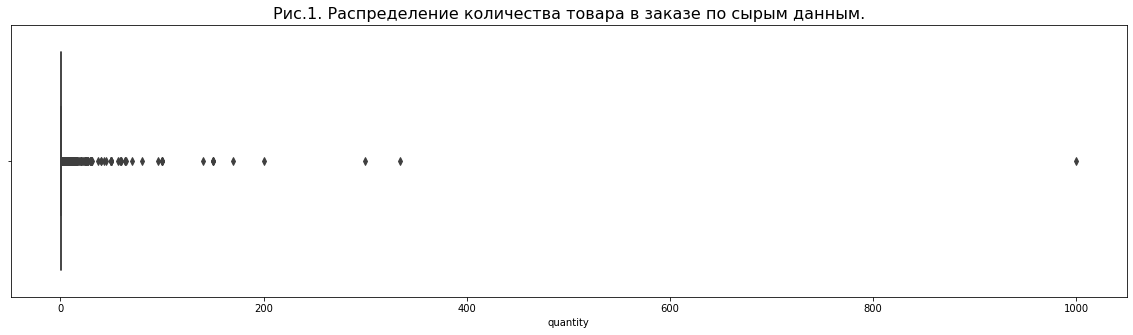

In [15]:
# найдем выбросы в столбце quantity с помощью перцентилей.
data_anomal = data['quantity'].quantile(.99) # граница аномальных значений в кол-ве товара в заказе
print('99-й перцентиль кол-ва товара в заказе: {:.0f} '.format(data_anomal))

# кол-во аномальных значений в столбце 'quantity'
anomalnumber_q = data[data['quantity'] > data_anomal]['quantity'].count()
print('Количество строк с аномальными значениями: {} строка'.format(anomalnumber_q))
print('Доля аномальных значений от общего количества записей: {:.1%}'.format(data_anomal / len(data))) 

# Визуализируем распределение выбросов через график boxplot

plt.figure(figsize=(20,5))
sns.boxplot(x='quantity', data=data)
plt.title('Рис.1. Распределение количества товара в заказе по сырым данным.', fontsize=16)
plt.show()

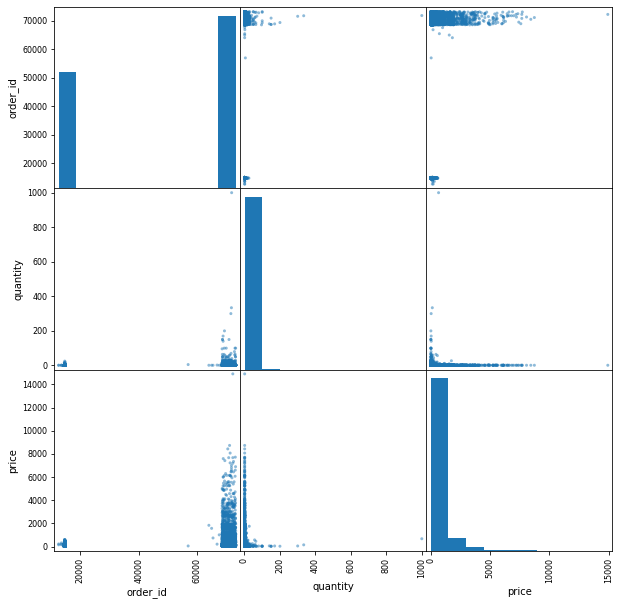

In [16]:
# Построим матрицу рассеяния перед удалением аномалий
pd.plotting.scatter_matrix(data, figsize = (10, 10))
plt.show()

Аномалии составляют не более 1%. На графике рассеяния видим анаомалии колличестве - 1000 и цене 14000. Проверим

In [17]:
data[data['quantity'] >= 1000]

,date,customer_id,order_id,product,quantity,price
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,вантуз с деревянной ручкой d14 см красный burs...,1000,675.0


Заказ на 1000 вантузов был тестовый. Можем исключить.

In [18]:
data[data['price'] > 14000]

,date,customer_id,order_id,product,quantity,price
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400...,1,14917.0


Сушилка стоимостью почти 15 тыс. подозрительно дорогая. Проверил сколько стоят уличные сушилки. Явная аномалия, исключаем.

In [19]:
# удаляем аномалии
data = data[data['product'] != 'вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000']
data = data[data['product'] != 'сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237 см зеленая']
data=data.reset_index(drop=True)

## Добавление столбцов

In [20]:
data.head(1)

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,комнатное растение в горшке алое вера d12 h30,1,142.0


In [21]:
# Добавляем столбец с выручкой
data['revenue'] = data['quantity'] * data['price']

# Добавляем столбецы с времеменными промежутками

data['hour'] = data.date.dt.hour
data['day'] = (data.date.dt.dayofweek) + 1 # +1, чтобы понедельник = 1, и так до воскресенья = 7
data['week'] = data.date.dt.week
data['month'] = data.date.dt.month
data['year'] = data.date.dt.year
data['date'] = data.date.dt.date

In [22]:
data.head(5)

,date,customer_id,order_id,product,quantity,price,revenue,hour,day,week,month,year
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,комнатное растение в горшке алое вера d12 h30,1,142.0,142.0,0,1,40,10,2018
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,комнатное растение в горшке кофе арабика d12 h25,1,194.0,194.0,0,1,40,10,2018
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,0,1,40,10,2018
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,0,1,40,10,2018
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,0,1,40,10,2018


In [23]:
# Напишем функцию weekdays, принимающую номер дня от 1 до 5 и возвращающую будни, где 1 = да, 0 = нет.

def weekdays(day):
    if  1 <= day <= 5:
        return 1
    else:
        return 0
    
# Функция sensor_weekends, принимающяя номер дня от 6 до 7 и возвращающую выходные, где 1 = да, 0 = нет.
def weekdays(day):
    if  6 <= day <= 7:
        return 1
    else:
        return 0

In [24]:
# Cоздадим отдельные столбецы будни/выходные в зависимости от дня, 
# и в его ячейках запишем значения возвращаемые функцией.

data['weekdays'] = data['day'].apply(weekdays)
data['weekends'] = data['day'].apply(weekdays)
display(data.shape)
data.sample(5, random_state=123) 

(4784, 14)

,date,customer_id,order_id,product,quantity,price,revenue,hour,day,week,month,year,weekdays,weekends
596,2018-11-07,2bfd7229-507c-4bf9-b4f2-d48813b93ffb,68909,герань домашняя пеларгония зональная цветущая ...,1,149.0,149.0,20,3,45,11,2018,0,0
3260,2019-05-16,ca274b0b-9724-4be9-b834-3f6749fc683f,14784,рассада зелени для кухни петрушка корневая сах...,1,128.0,128.0,22,4,20,5,2019,0,0
2091,2019-03-27,fbe13d54-acb6-45b1-a837-8d2173df5d28,70899,тортница curver 00416-286-00,1,824.0,824.0,21,3,13,3,2019,0,0
380,2018-10-25,9669d757-8412-4d30-93b6-30db2ac9cac1,14496,пеларгония зональная диам. 12 см сиреневый пол...,1,188.0,188.0,1,4,43,10,2018,0,0
1424,2019-02-04,5375ad01-5d2e-425e-95bb-e83d2f9f47cf,70087,сушилка для белья настенная zalger prima 510-7...,1,299.0,299.0,12,1,6,2,2019,0,0


In [25]:
# Напишем функцию season, принимающую номер месяца от 1 до 12, 
# и возвращающую время года, которому этот месяц принадлежит (весна, лето, осень или зима).
def season(month):
    if  3 <= month <= 5:
        return 'весна'
    elif 6 <= month <= 8:
        return 'лето'
    elif 9 <= month <= 11:
        return 'осень'
    else:
        return 'зима'

In [26]:
# Cоздадим отдельный столбец с временами года в зависимости от месяца, 
# и в его ячейках записать значения, возвращаемые функцией.
data['season'] = data['month'].apply(season)
display(data.shape)
data.sample(5)

(4784, 15)

,date,customer_id,order_id,product,quantity,price,revenue,hour,day,week,month,year,weekdays,weekends,season
1472,2019-02-07,1082b33a-b43e-4e60-ab13-6fb896dd3459,70150,хлебница деревянная бук кб-028 35х28х19 см 152...,2,562.0,1124.0,20,4,6,2,2019,0,0,зима
352,2018-10-23,49b9c587-c19e-4481-bace-967aeac357fa,14494,пеларгония зональная диам. 12 см малиново-крас...,1,188.0,188.0,13,2,43,10,2018,0,0,осень
3643,2019-06-05,7d5d5657-5fdc-40d1-b7b6-bb04ede92b53,14848,роза садовая чайногибридная в горшке дежавю,1,188.0,188.0,9,3,23,6,2019,0,0,лето
18,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,сушилка для белья напольная colombo star 18 3679,1,1049.0,1049.0,18,1,40,10,2018,0,0,осень
1990,2019-03-17,ad935627-11d4-4a1c-9d69-cf0e33047aa8,14575,рассада томата помидор сорт черный шоколад кас...,1,116.0,116.0,18,7,11,3,2019,1,1,весна


__Вывод:__

 - дата приведена к удобочитаемому формату
 - удалены явные и неявные дубликаты
 - удалены аномалии
 - добавил дополнительные столбцы: выручка, час, день, неделя, месяц, год, дата, будни и выходные, сезоны 

# Исследовательский анализ данных

## Общие метрики

In [27]:
# период данных датасета
data_min_date = data.date.min()
data_max_date = data.date.max()

print('Дата первой записи:',data_min_date)
print('Дата последней записи:',data_max_date)
print('Дата первой записи:',data_max_date - data_min_date)

print('Общее количество уникальных покупателей: {:.0f}'.format(len(data['customer_id'].unique())))
print('Общее количество уникальных товаров: {:.0f}'.format(len(data['product'].unique())))
print('Количество уникальных заказов: {:.0f}'.format(len(data['order_id'].unique())))

Дата первой записи: 2018-10-01
Дата последней записи: 2019-10-31
Дата первой записи: 395 days, 0:00:00
Общее количество уникальных покупателей: 2393
Общее количество уникальных товаров: 2325
Количество уникальных заказов: 2754


- Дата первой записи: 2018-10-01
- Дата последней записи: 2019-10-31
- Дата первой записи: 395 days, 0:00:00
- Общее количество уникальных покупателей: 2393
- Общее количество уникальных товаров: 2325
- Количество уникальных заказов: 2754

In [28]:
data.head(2)

,date,customer_id,order_id,product,quantity,price,revenue,hour,day,week,month,year,weekdays,weekends,season
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,комнатное растение в горшке алое вера d12 h30,1,142.0,142.0,0,1,40,10,2018,0,0,осень
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,комнатное растение в горшке кофе арабика d12 h25,1,194.0,194.0,0,1,40,10,2018,0,0,осень


In [29]:
grouped_by_orders = data.groupby(['customer_id', 'order_id'])\
.agg({'date':'first', 'product':'count', 'quantity':'sum','price':'mean', 'revenue':'sum'}).reset_index()\
.rename(columns={'date':'first_date_order', 'product':'cnt_unique_products_in_order', 
                 'quantity':'total_cnt_goods_in_order', 'price':'avg_product_price', 'revenue':'order_price'})

grouped_by_customers = grouped_by_orders.groupby('customer_id')\
.agg({'order_id':'nunique', 'cnt_unique_products_in_order':'mean', 'total_cnt_goods_in_order':'mean', 
      'avg_product_price':'mean', 'order_price':['sum','mean']}).reset_index()

grouped_by_customers.columns = ['customer_id', 'cnt_orders', 'avg_products_in_order', 'avg_goods_in_order', 
                                'avg_product_price', 'total_revenue', 'avg_order_price']

print('Cредняя выручка с одного покупателя: {:.0f} у.е.'.format(grouped_by_customers['total_revenue'].median()))
print('Cредняя сумма заказа: {:.0f} у.е.'.format(grouped_by_customers['avg_order_price'].median()))
print('Cреднее число позиций товаров в заказах: {:.0f} шт.'.format(grouped_by_customers['avg_products_in_order']\
                                                                .median()))
print('Cреднее число единиц товаров в заказах: {:.0f} шт.'.format(grouped_by_customers['avg_goods_in_order']\
                                                                .median()))
print('Средний чек по всем покупателям: {:.0f} у.е.'\
      .format((grouped_by_customers['total_revenue']/grouped_by_customers['cnt_orders']).median()))

Cредняя выручка с одного покупателя: 712 у.е.
Cредняя сумма заказа: 674 у.е.
Cреднее число позиций товаров в заказах: 1 шт.
Cреднее число единиц товаров в заказах: 1 шт.
Средний чек по всем покупателям: 674 у.е.


- Cредняя выручка с одного покупателя: 712 у.е.
- Cредняя сумма заказа: 674 у.е.
- Cреднее число позиций товаров в заказах: 1 шт.
- Cреднее число единиц товаров в заказах: 1 шт.
- Средний чек по всем покупателям: 674 у.е.

## Изменение количества заказов во времени

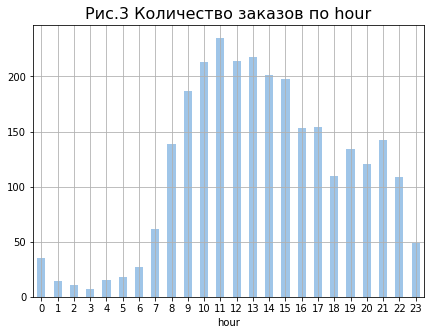

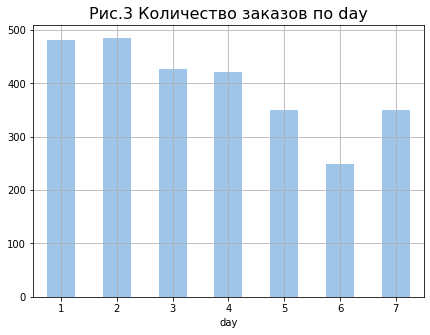

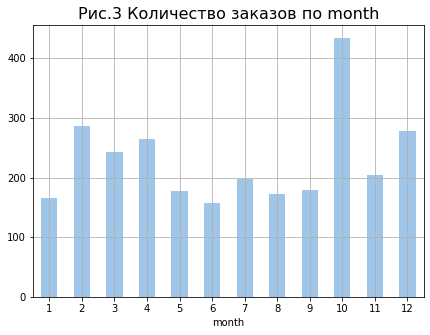

In [30]:
# Создадим цикл для автоматического построения графиков. 
# Посмотрим на распределение заказов во времени, по часам, по дням, по месяцам. 

for columns in ['hour', 'day', 'month']:
    data.pivot_table(index=columns, values='order_id', aggfunc='nunique', fill_value=0)\
    .plot(kind='bar', figsize=(7,5), grid=True, y=['order_id'], color='#9FC5E8', fontsize=10, legend=False)
    plt.title('Рис.3 Количество заказов по ' + columns, fontsize=16)
    plt.xticks(rotation=0)
    plt.show()

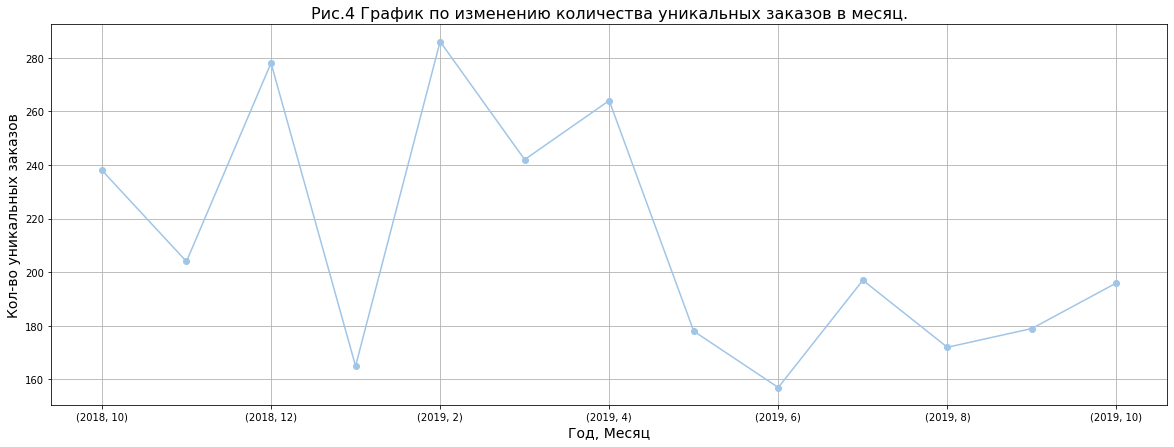

In [31]:
# График по изменению месячных заказов во времени.
data.groupby(['year', 'month']).agg({'order_id': 'nunique'}) \
      .plot(marker='o', figsize=(20,7), grid=True, legend=False, color='#9FC5E8')
plt.title('Рис.4 График по изменению количества уникальных заказов в месяц.', fontsize=16)
plt.xlabel('Год, Месяц',fontsize=14)
plt.ylabel('Кол-во уникальных заказов',fontsize=14)
plt.show()

__Вывод:__

   - Наиболее популярное время заказов с 9-15:00, наименее популярное с 23:00-07:00
   - Наиболее популярный день заказов понедельник-вторник, наименее популярна - суббота
   - Самый популярный месяц - Октябрь, самый не популярный - Январь и Июнь
   - Наибольшее среднее количество заказов в период февраля-апрель 2019 г., просадки в январе и июне 2019

## Изменение выручки во времени

Посмотрим на выручку c заказов. Какие товары интернет-магазина приносят наибольшую прибыль. Как меняется эта метрика с течением времени. Найдем бестселлеры за весь период.

In [32]:
# Сумма выручки
revenue_sum = data['revenue'].sum()
print('Сумма выручки: {:.2f} у.е.'.format(revenue_sum))

Сумма выручки: 4068155.00 у.е.


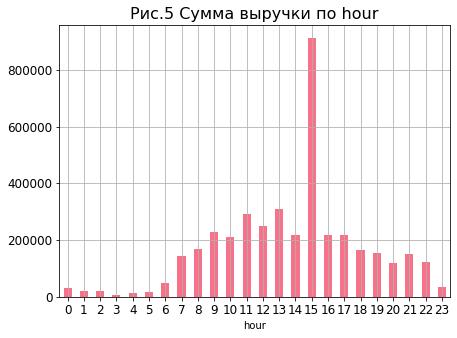

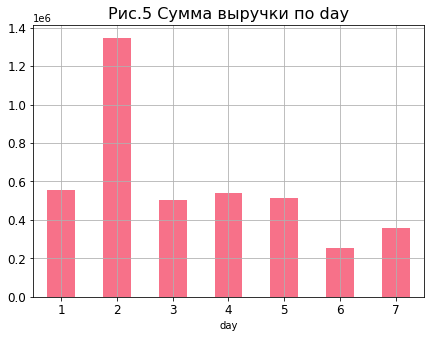

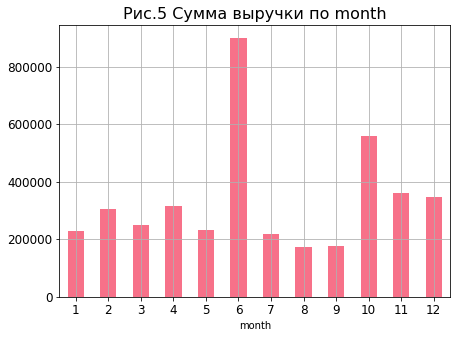

In [33]:
# Цикл для автоматического построения графиков.
# Посмотрим на распределение выручки во времени, по часам, по дням, по месяцам. 

for columns in ['hour', 'day', 'month']:
    data.pivot_table(index=columns, values='revenue', aggfunc='sum', fill_value=0)\
    .plot(kind='bar', figsize=(7,5), grid=True, y=['revenue'], color='#f77189', fontsize=12, legend=False)
    plt.title('Рис.5 Сумма выручки по ' + columns, fontsize=16)
    plt.xticks(rotation=0)
    plt.show()

__Вывод:__

   - Общая выручка составила:4 068 155 у.е.
   - Наибольшая выручка наблюдается в 9-17:00 с пиком в 15:00
   - Будние дни выручка выше, в выходные меньше. В будние дни видим всплеск во вторник. 
   - Лидирующий месяцы - Июнь и Октябрь, самая низкая в августе-сентябре

## Cредний чек покупателя

,year,month,revenue,customers,orders,revenue_per_customer,revenue_per_order
8,2019,6,900116.0,148,157,6081.9,5733.2
1,2018,11,359348.0,178,204,2018.8,1761.5
0,2018,10,351162.0,179,238,1961.8,1475.5
3,2019,1,230097.0,149,165,1544.3,1394.5
7,2019,5,233874.0,164,178,1426.1,1313.9
2,2018,12,345921.0,228,278,1517.2,1244.3
6,2019,4,316469.0,235,264,1346.7,1198.7
9,2019,7,220015.0,185,197,1189.3,1116.8
4,2019,2,305183.0,244,286,1250.8,1067.1
12,2019,10,206490.0,167,196,1236.5,1053.5


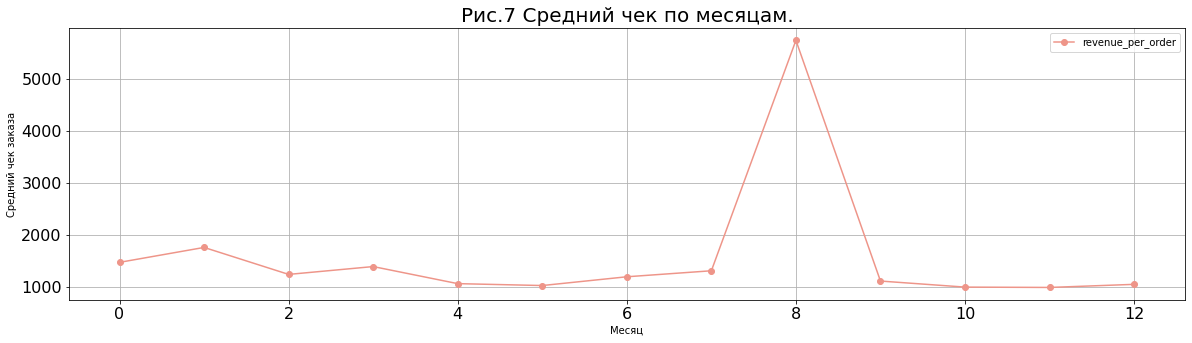

In [34]:
# Найдём средний чек покупателя

avg_cheque = data.groupby(['year','month']) \
                                    .agg({'revenue':'sum','customer_id':'nunique', 'order_id':'nunique'})\
                                                                                                .reset_index()
avg_cheque.columns = ['year', 'month', 'revenue', 'customers', 'orders'] # переименуем столбцы 
avg_cheque['revenue_per_customer'] = (avg_cheque['revenue'] / avg_cheque['customers']).round(1)

# Найдём средний чек заказов 

avg_cheque['revenue_per_order'] = (avg_cheque['revenue'] / avg_cheque['orders']).round(1)

display(avg_cheque.sort_values(by='revenue_per_order',ascending=False))

avg_cheque.plot(marker='o', y=['revenue_per_order'], figsize=(20,5), grid=True, color='#ee9589', fontsize=16)
plt.title('Рис.7 Средний чек по месяцам.', fontsize=20)
plt.xlabel('Месяц')
plt.ylabel('Средний чек заказа')
plt.show()

 - Средний чек стабилен и варьирует от 1000-1750 с выскоким в январе-апреле и низким в октябре-декабре, но в августе видим всплеск на отметке 5 783. Возмоно связано с большой закупкой.
 - Сентябрь 2019 Г. показывает наименьший средний чек на покупателя и средний чек по заказу 

__Вывод:__

`Общие метрики`

- Дата первой записи: 2018-10-01
- Дата последней записи: 2019-10-31
- Дата первой записи: 395 days, 0:00:00
- Общее количество уникальных покупателей: 2393
- Общее количество уникальных товаров: 2325
- Количество уникальных заказов: 2754
- Общая выручка составила:4 068 155 у.е.
- Наибольшая выручка наблюдается в 9-17:00 с пиком в 15:00
- Будние дни выручка выше, в выходные меньше. В будние дни видим всплеск во вторник. 
- Лидирующий месяцы - Июнь и Октябрь, самая низкая в августе-сентябре
- Средний чек стабилен и варьирует от 1000-1750 с выскоким в январе-апреле и низким в октябре-декабре, но в августе видим всплеск на отметке 5 783. Возмоно связано с большой закупкой.
- Сентябрь 2019 Г. показывает наименьший средний чек на покупателя и средний чек по заказу 
- Наиболее популярное время заказов с 9-15:00, наименее популярное с 23:00-07:00
- Наиболее популярный день заказов понедельник-вторник, наименее популярна - суббота
- Самый популярный месяц - Октябрь, самый не популярный - Январь и Июнь
- Наибольшее среднее количество заказов в период февраля-апрель 2019 г., просадки в январе и июне 2019


`Пользовательские метрики`

- Cредняя выручка с одного покупателя: 712 у.е.
- Cредняя сумма заказа: 674 у.е.
- Cреднее число позиций товаров в заказах: 1 шт.
- Cреднее число единиц товаров в заказах: 1 шт.
- Средний чек по всем покупателям: 674 у.е.

# Сегментирование товаров


- колличество уникальных продуктов
- лематизация товаров
- категоризация товаров
- распределение товаров по категориям
- средняя стоимость товаров по категориям¶

In [35]:
# Количество уникальных продуктов

print('Количество уникальных продуктов:', len(data['product'].unique()))
data['product'].value_counts().head()

Количество уникальных продуктов: 2325


пеларгония розебудная red pandora укорененный черенок      64
пеларгония розебудная prins nikolai укорененный черенок    53
пеларгония зональная диам. 12 см сиреневый полумахровый    52
сумка-тележка 2-х колесная gimi argo синяя                 47
пеларгония розебудная mary укорененный черенок             39
Name: product, dtype: int64

## Лематизация товаров

In [36]:
# Выделим леммы в значениях столбца с наименованием товара, которые пригодиться для создания словаря, 
# который будем использовать для категоризации товара.

m = Mystem()
data['lemmas'] = data['product'].apply(m.lemmatize)
lemmas = Counter(data['lemmas'].sum()).most_common()
lemmas

[(' ', 33122),
 ('\n', 4783),
 ('см', 2111),
 ('-', 1940),
 ('для', 1004),
 ('пеларгония', 820),
 ('рассада', 594),
 ('в', 542),
 ('л', 491),
 ('зональный', 487),
 ('d', 459),
 ('. ', 456),
 ('диам', 452),
 ('12', 437),
 ('кассета', 396),
 ('с', 395),
 ('шт', 367),
 ('сорт', 360),
 ('тележка', 344),
 ('махровый', 340),
 ('черенок', 332),
 ('укоренять', 330),
 ('9', 323),
 ('белый', 317),
 ('сумка', 312),
 ('белье', 305),
 ('красный', 304),
 ('объем', 296),
 ('горшок', 275),
 ('сушилка', 272),
 ('по', 257),
 ('цветок', 243),
 ('розебудный', 243),
 ('доска', 234),
 ('05', 233),
 ('gimi', 232),
 ('кухня', 225),
 ('6', 225),
 ('зелень', 220),
 ('10', 206),
 ('синий', 200),
 ('розовый', 196),
 ('2', 195),
 ('гладильный', 192),
 ('/', 191),
 ('полумахровый', 185),
 ('однолетний', 184),
 ('7', 175),
 ('петуния', 171),
 ('томат', 170),
 ('россия', 167),
 ('муляж', 166),
 ('30', 166),
 ('помидор', 162),
 ('№', 160),
 ('кг', 159),
 ('4', 157),
 ('ника', 153),
 ('м', 151),
 ('и', 151),
 ('h', 147

## Категоризация товаров

In [37]:
# Создадим функцию для разбивки товаров по категориям

def lemmas_category(lemmas):
    if ('гладильный' in lemmas) or ('сушилка' in lemmas) or\
    ('одежда' in lemmas) or ('вешалка' in lemmas) or\
    ('подкладка' in lemmas) or ('подрукавник' in lemmas) or\
    ('обувь' in lemmas) or ('плечики' in lemmas) or\
    ('одежный' in lemmas) or ('обувной' in lemmas):
        return 'Для одежды и обуви'
    if ('пружина' in lemmas) or ('петля' in lemmas) or\
    ('проволочный' in lemmas) or ('инструмент' in lemmas) or\
    ('стремянка' in lemmas) or ('корыто' in lemmas) or\
    ('цинк' in lemmas) or ('строительный' in lemmas) or\
    ('сверло' in lemmas) or ('сварка' in lemmas) or ('стяжка' in lemmas) or\
    ('набор' in lemmas) or ('измерительный' in lemmas) or\
    ('длина' in lemmas) or ('батарейка' in lemmas) or\
    ('бензин' in lemmas) or ('шило' in lemmas) or\
    ('сметка' in lemmas) or ('уличный' in lemmas) or ('веревка' in lemmas):
        return 'Стройка и ремонт'
    if ('кружка' in lemmas) or ('лоток' in lemmas) or\
    ('сковорода' in lemmas) or ('сотейник' in lemmas) or ('салатник' in lemmas) or\
    ('кастрюля' in lemmas) or ('котел' in lemmas) or\
    ('овощеварка' in lemmas) or ('мантоварка' in lemmas) or\
    ('соковарка' in lemmas) or ('миска' in lemmas) or\
    ('противень' in lemmas) or ('нож' in lemmas) or\
    ('столовая' in lemmas) or ('столовый' in lemmas) or\
    ('чайный' in lemmas) or ('терка' in lemmas) or\
    ('толкушка' in lemmas) or ('тарелка' in lemmas) or\
    ('термокружок' in lemmas) or ('свч' in lemmas) or\
    ('ложка' in lemmas) or ('банка' in lemmas) or\
    ('крышка' in lemmas) or ('пищевой' in lemmas) or\
    ('овощ' in lemmas) or ('венчик' in lemmas) or\
    ('хлебница' in lemmas) or ('рыбочистка' in lemmas) or\
    ('бокал' in lemmas) or ('фужер' in lemmas) or\
    ('чайный' in lemmas) or ('форма' in lemmas) or\
    ('картофелемялка' in lemmas) or ('ножеточка' in lemmas) or\
    ('бутылка' in lemmas) or ('стакан' in lemmas) or\
    ('лезвие' in lemmas) or ('лопатка' in lemmas) or\
    ('ковш' in lemmas) or ('разделочный' in lemmas) or\
    ('термос' in lemmas) or ('сито' in lemmas) or\
    ('плита' in lemmas) or ('пресс' in lemmas):
        return 'Посуда'
    if ('чайник' in lemmas) and ('эмалированный' in lemmas) or ('заварочный' in lemmas):
        return 'Посуда'
    if ('покрывало' in lemmas) or ('хлопок' in lemmas) or\
    ('салфетка' in lemmas) or ('одеяло' in lemmas) or\
    ('полотенце' in lemmas) or ('подушка' in lemmas) or\
    ('скатерть' in lemmas) or ('плед' in lemmas) or ('халат' in lemmas):
        return 'Текстиль'
    if ('электрический' in lemmas) or ('миксер' in lemmas) or\
    ('фен' in lemmas) or ('паровой' in lemmas) or\
    ('пылесос' in lemmas) or ('весы' in lemmas) or\
    ('светильник' in lemmas):
        return 'Бытовая техника'
    if ('сумка' in lemmas) or ('тележка' in lemmas) or\
    ('кофр' in lemmas) or ('хранение' in lemmas) or\
    ('ящик' in lemmas) or ('коробка' in lemmas) or\
    ('корзина' in lemmas) or ('контейнер' in lemmas) or\
    ('таз' in lemmas) or ('полка' in lemmas) or ('комод' in lemmas):
        return 'Хранение'
    if ('цветок' in lemmas) and ('искусственный' in lemmas) or\
    ('композиция' in lemmas) or ('подарочный' in lemmas) or\
    ('открытка' in lemmas) or ('упаковка' in lemmas) or\
    ('новогодний' in lemmas) or ('картина' in lemmas) or\
    ('фотография' in lemmas) or ('муляж' in lemmas):
        return 'Декор и подарки'
    if ('рассада' in lemmas) and ('зелень' in lemmas) or ('томат' in lemmas) or\
    ('капуста' in lemmas) or ('перец' in lemmas) or ('огурец' in lemmas) or\
    ('тыква' in lemmas) or ('кабачок' in lemmas) or\
    ('клубника' in lemmas) or ('арбуз' in lemmas) or\
    ('дыня' in lemmas) or ('патиссон' in lemmas) or\
    ('баклажан' in lemmas) or ('земляника' in lemmas) or\
    ('морковь' in lemmas) or ('петрушка' in lemmas) or\
    ('цветок' in lemmas) and ('рассада' in lemmas) or\
    ('однолетний' in lemmas) or ('многолетний' in lemmas) or\
    ('петуния' in lemmas) or ('черенок' in lemmas) or ('крупноцветковый' in lemmas) or\
    ('цвести' in lemmas) or ('садовый' in lemmas) or ('объем' in lemmas) or\
    ('растение' in lemmas) and ('комнатный' in lemmas) or\
    ('домашний' in lemmas) or ('горшок' in lemmas) or\
    ('кашпо' in lemmas) or ('пеларгония' in lemmas) or ('d' in lemmas) or\
    ('пряный' in lemmas) or ('лекарственный' in lemmas) or ('кассета' in lemmas):
        return 'Сад и огород'
    if ('d' in lemmas) and ('вантуз' in lemmas) or\
    ('d' in lemmas) and ('щетка' in lemmas) or\
    ('d' in lemmas) and ('чехол' in lemmas) or\
    ('d' in lemmas) and ('коврик' in lemmas) or\
    ('d' in lemmas) and ('средство' in lemmas):
        return 'Для уборки'
    if ('ванный' in lemmas) or ('ванна' in lemmas) or ('ванная' in lemmas) or\
    ('туалет' in lemmas) or ('туалетный' in lemmas) or\
    ('унитазный' in lemmas) or ('унитаз' in lemmas) or\
    ('белье' in lemmas) or ('стиральный' in lemmas) or\
    ('коврик' in lemmas) or ('ковер' in lemmas) or ('вантуз' in lemmas) or\
    ('посуда' in lemmas) or ('мытье' in lemmas) or ('чистка' in lemmas) or\
    ('щетка' in lemmas) or ('мыло' in lemmas) or ('швабра' in lemmas) or\
    ('зубной' in lemmas) or ('кухонный' in lemmas) or\
    ('круглый' in lemmas) or ('чистить' in lemmas) or\
    ('перчатка' in lemmas) or ('деревянный' in lemmas) or\
    ('тряпка' in lemmas) or ('скребок' in lemmas) or\
    ('ведро' in lemmas) or ('карниз' in lemmas) or\
    ('совок' in lemmas) or ('губка' in lemmas) or\
    ('антижир' in lemmas) or ('кольцо') or\
    ('мл' in lemmas) or ('чехол' in lemmas) or\
    ('придверный' in lemmas) or ('средство' in lemmas):
        return 'Для чистоты и уборки'
    
data['product_category'] = data['lemmas'].apply(lemmas_category)

## Распределение товаров по категориям

In [38]:
# Выведем статистику по категориям товарного ассортимента.
data_category = data.groupby('product_category').agg({'product':'count'}).reset_index()
data_category.columns = ['category', 'products']

data_category['ratio'] = ((data_category['products'] / len(data))*100).round(1).astype('str')+'%'
display(data_category.sort_values(by='products', ascending = False))

,category,products,ratio
5,Сад и огород,2353,49.2%
2,Для одежды и обуви,584,12.2%
3,Для чистоты и уборки,520,10.9%
8,Хранение,437,9.1%
4,Посуда,323,6.8%
1,Декор и подарки,297,6.2%
6,Стройка и ремонт,153,3.2%
7,Текстиль,92,1.9%
0,Бытовая техника,25,0.5%


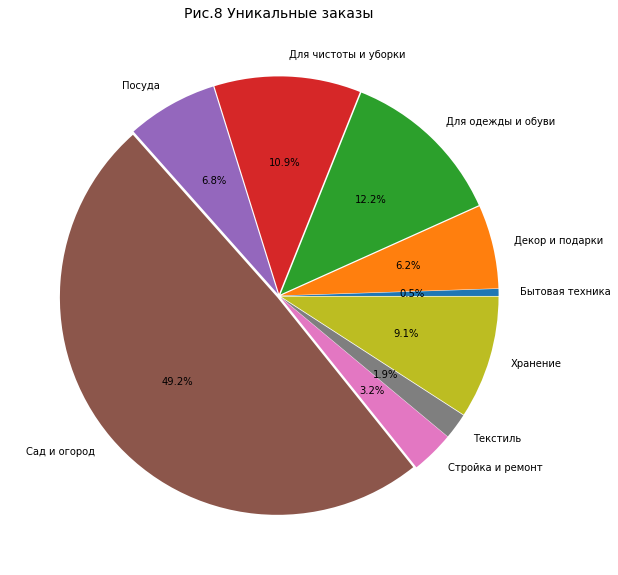

In [39]:
# построим диаграмму распределения товаров по категориям

plt.figure(figsize = (10, 10))
plt.pie(data_category['products'], labels=data_category['category'], autopct='%.1f%%', explode=[0.01]*9,\
        )
plt.title('Рис.8 Уникальные заказы', fontsize=14)

plt.show()

__Вывод:__

  - почти 50% или 2 353 заказа приходится на категорию "Сад и огород"
  - менее 1% или 25 заказ приходится на категорию "бытовая техника"

## Средняя стоимость товаров по категориям

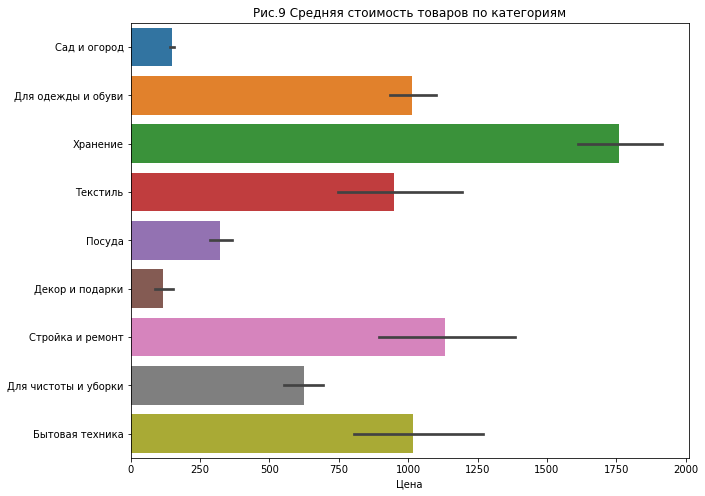

In [40]:
plt.figure(figsize=(10, 8))
sns.barplot(data=data, y='product_category', x='price')
plt.xlabel('Цена')
plt.ylabel('')
plt.title('Рис.9 Средняя стоимость товаров по категориям')
plt.show()

__Вывод:__

__В ходе анализа выделили 9 категорий товаров:__

    - Сад и огород
    - Для одежды и обуви
    - Для чистоты и уборки
    - Хранение
    - Посуда
    - Декор и подарки
    - Стройка и ремонт
    - Текстиль
    - Бытовая техника

  - почти 50% или 2 353 заказа приходится на категорию "Сад и огород", менее 1% или 25 заказов приходится на категорию "бытовая техника"
  - наибольшая средняя стоимость в категории "Хранение", наименьшая в категории "Декор и подарки"

# Сегментация покупателей 

## Пользовательская активность

In [41]:
dau_total = data.groupby('date').agg({'customer_id':'nunique'}).mean()
wau_total = data.groupby('week').agg({'customer_id':'nunique'}).mean()
mau_total = data.groupby('month').agg({'customer_id':'nunique'}).mean()

print('Среднее количество уникальных пользователей в день: {} человек.'.format(int(dau_total)))
print('Среднее количество уникальных пользователей в неделю: {} человек.'.format(int(wau_total)))
print('Среднее количество уникальных пользователей в месяц: {} человек.'.format(int(mau_total)))

Среднее количество уникальных пользователей в день: 6 человек.
Среднее количество уникальных пользователей в неделю: 48 человек.
Среднее количество уникальных пользователей в месяц: 203 человек.


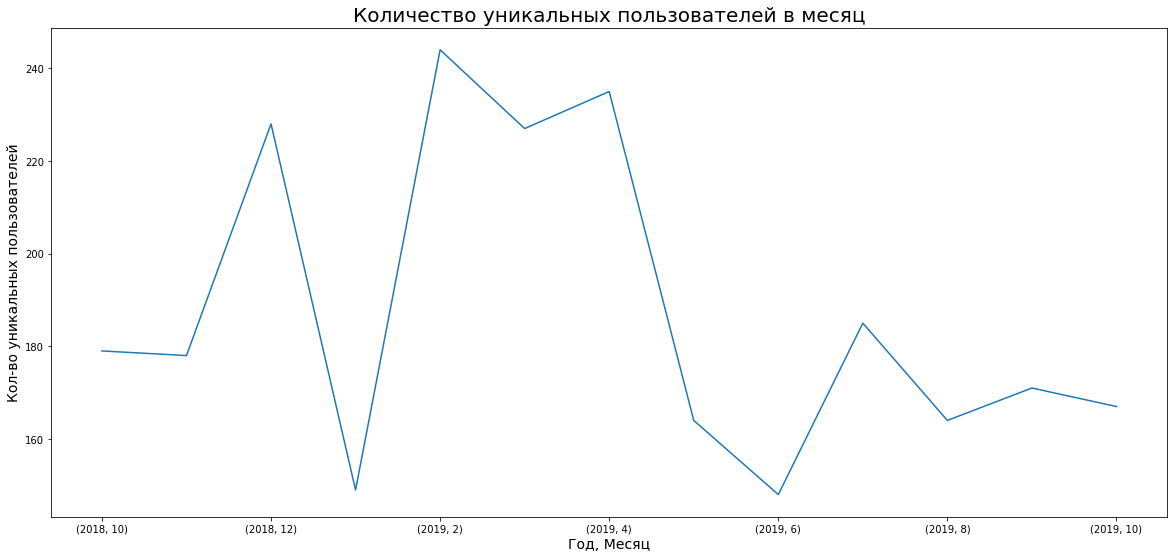

In [42]:
# График кол-ва изменения уникальных пользователей за период исследования
data.groupby(['year', 'month']).agg({'customer_id':'nunique'}).plot(figsize=(20, 9), legend=False)
plt.title('Количество уникальных пользователей в месяц',fontsize=20)
plt.xlabel('Год, Месяц',fontsize=14)
plt.ylabel('Кол-во уникальных пользователей',fontsize=14)
plt.show()

__Вывод:__

С февраля-апрель и в декабре наибольшая пользовательская активность. В январе и июне количество пользователей резко падает. Вероятно это связано с периодом праздничных и отпускных дней. Клиенты либо уже приобрели все необходимое, либо предпочтут офлайн магазин для более скорого результата.

## Сегментация на основе машинного обучения

In [43]:
# выделяем кластеры
data_clust_copy = data.copy(deep=True)
data_clust_copy.loc[:, 'test_column'] = 1
data_clust = data_clust_copy.pivot_table(index = 'customer_id', columns = 'product_category',\
                values='test_column', aggfunc='mean').reset_index().fillna(0)

# Разделим наши данные на признаки (матрица X) и целевую переменную (y).
X = data_clust.drop('customer_id', axis=1)
y = data_clust['customer_id']

#Разделяем модель на обучающую и валидационную выборку.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [44]:
# стандартизация данных
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#Построение матрицы расстояний
linked = linkage(X_sc, method = 'ward')

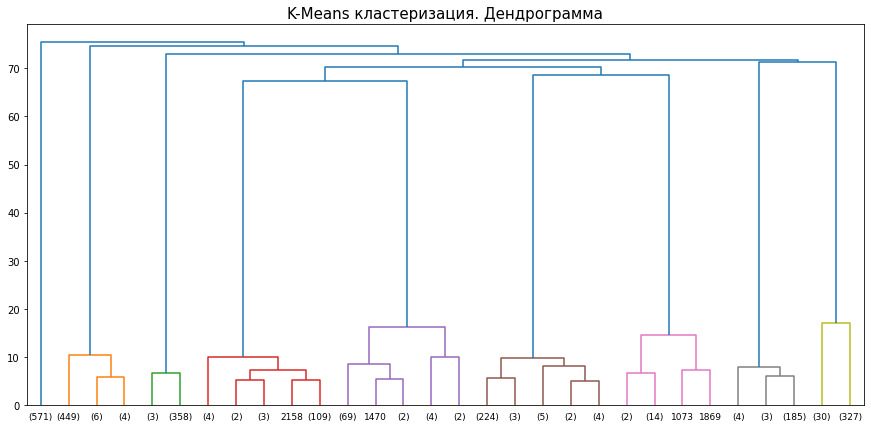

In [45]:
# строим дендограму
plt.figure(figsize=(15, 7))  
dendrogram(linked, orientation='top',
           truncate_mode='lastp',   
           p=30,   
           leaf_rotation=0,
           leaf_font_size=9)     
plt.title('K-Means кластеризация. Дендрограмма', size=15)
plt.show()

Исходя из дендограммы выделим 9 кластеров: столько же, сколько категорий товаров.

In [46]:
km = KMeans(n_clusters = 9, random_state=0) # задаём число кластеров, равное 9
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров

# сохраняем метки кластера в поле нашего датасета
data_clust['cluster_km'] = labels

clusters = data_clust.groupby('cluster_km').mean().T.iloc[:9]

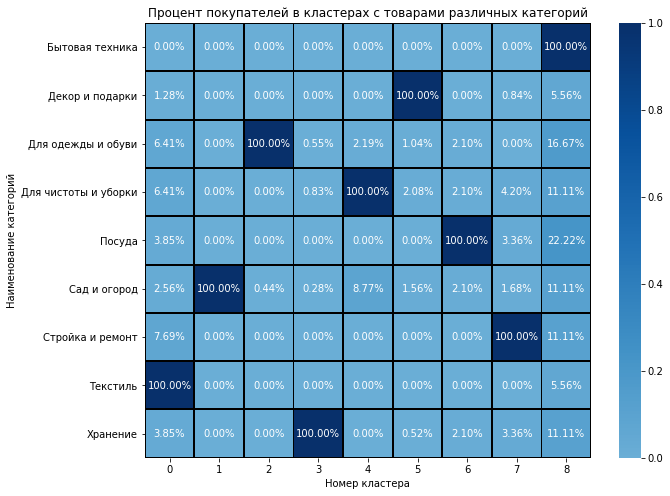

In [47]:
plt.figure(figsize = (10, 8))
plt.title('Процент покупателей в кластерах с товарами различных категорий', size = 12)
sns_plot = sns.heatmap(clusters, annot=True, fmt='.2%', 
                      linewidth=1, linecolor='black', vmax=1, center=0, cmap='Blues')
fig = sns_plot.get_figure()
plt.xlabel('Номер кластера')
plt.ylabel('Наименование категорий')
plt.show()

По графику видим, что для каждого кластера характерна определенная категория товаров. Присвоим каждому кластеру свою категорию товаров.

In [48]:
cluster_cat = pd.DataFrame()
categories = ['Сад и огород', 'Для одежды и обуви', 'Хранение', 'Текстиль',
       'Посуда', 'Декор и подарки', 'Стройка и ремонт',
       'Для чистоты и уборки', 'Бытовая техника']
for i, category in zip(range(0,9), categories):
    cluster_cat.loc[i, 'category'] = category
cluster_cat = cluster_cat.reset_index()
cluster_cat.columns = ['cluster_km', 'category']
cluster_cat

,cluster_km,category
0,0,Сад и огород
1,1,Для одежды и обуви
2,2,Хранение
3,3,Текстиль
4,4,Посуда
5,5,Декор и подарки
6,6,Стройка и ремонт
7,7,Для чистоты и уборки
8,8,Бытовая техника


__Вывод:__

Получили 9 кластеров, для каждого из которых характерна определенная категория товаров, что означает каждый из покупателей одного кластера хотя бы один раз купил данную категорию товара. По некоторым кластерам хорошо видно, что пользователи по мимо основной категории товаров, покупают с разной интенсивностью товары других категорий.

## Сравнение поведения покупателей из разных кластеров

In [49]:
# Соединим первоначальный датафрейм с датафреймом с кластерами по столбцу customer_id.
data = data.merge(data_clust, left_on='customer_id', right_on='customer_id')

In [50]:
#Сгруппируем получившуюся таблицу по кластерам и найдем метрики: среднее количество заказов, среднее количество 
# купленных товаров на одного покупателя, средний чек, суммарную выручку.

orders_filt_clust = data.groupby('cluster_km').agg({'customer_id':'nunique', 'order_id':'nunique',\
                    'product':'count', 'quantity':'sum', 'price':'mean','revenue':'sum'}).reset_index()\
       .rename(columns={'customer_id':'n_buyers', 'order_id':'n_orders', 'product':'cnt_products_in_order', 
                               'quantity':'cnt_goods_in_order','price':'avg_price','revenue':'total__revenue'})
# добавим столбцы 
orders_filt_clust['avg_orders_per_buyer'] = round(orders_filt_clust['n_orders']/\
                                                  orders_filt_clust['n_buyers'],0)
orders_filt_clust['avg_bill'] = orders_filt_clust['total__revenue'] / orders_filt_clust['n_orders']
orders_filt_clust['avg_goods_per_buyer'] = round(orders_filt_clust['cnt_goods_in_order'] /\
                                                 orders_filt_clust['n_buyers'], 0)

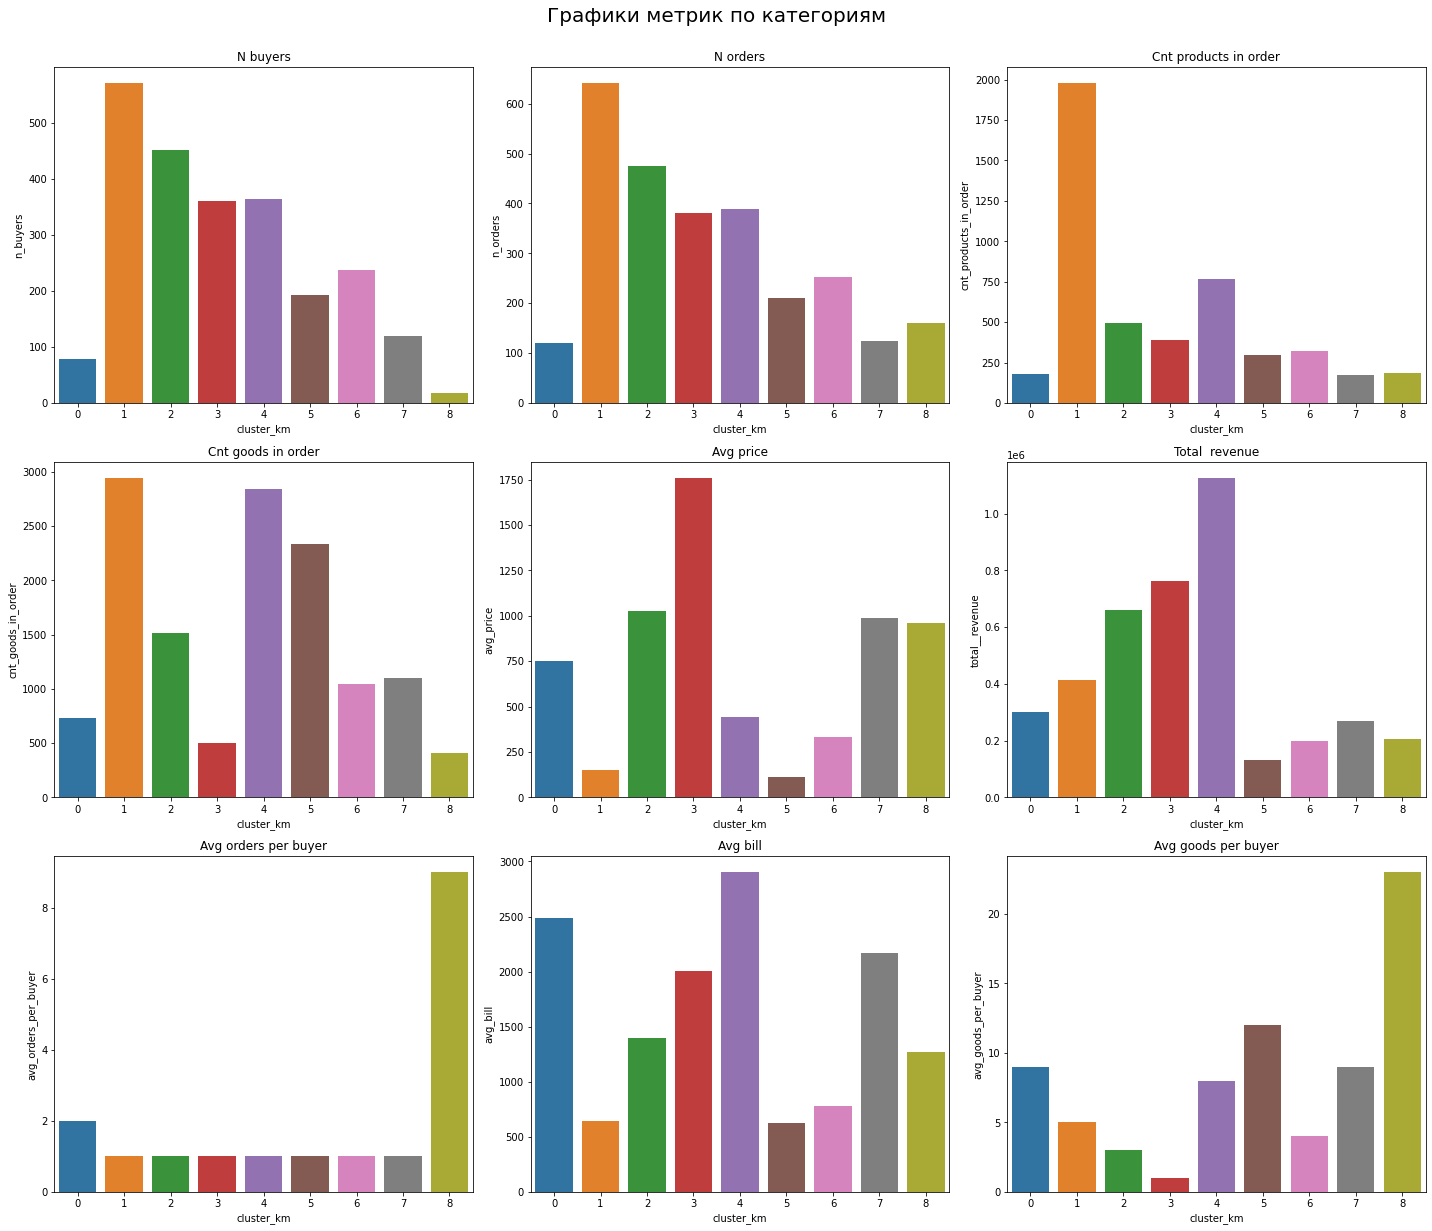

,cluster_km,n_buyers,n_orders,cnt_products_in_order,cnt_goods_in_order,avg_price,total__revenue,avg_orders_per_buyer,avg_bill,avg_goods_per_buyer
4,4,365,388,766,2839,444.575718,1126401.0,1.0,2903.095361,8.0
3,3,361,380,392,504,1760.280612,762065.0,1.0,2005.434211,1.0
2,2,451,474,495,1512,1028.094949,660521.0,1.0,1393.504219,3.0
1,1,571,641,1978,2946,148.885743,413293.0,1.0,644.762871,5.0
0,0,78,121,178,733,751.870787,300763.0,2.0,2485.644628,9.0
7,7,119,125,172,1099,987.244186,270749.0,1.0,2165.992000,9.0
8,8,18,161,184,407,962.309783,205074.0,9.0,1273.751553,23.0
6,6,238,253,320,1048,335.137500,197177.0,1.0,779.355731,4.0
5,5,192,211,299,2337,110.926421,132112.0,1.0,626.123223,12.0


In [51]:
# визуализируем распределение метрика по кластерам
WIDTH = 3
plot_amount = len(orders_filt_clust.columns)
height = plot_amount//WIDTH

fig, axs = plt.subplots(height, WIDTH, figsize=(20, 17))
fig.suptitle('Графики метрик по категориям',  y=1.003, size=20)

for item, ax in zip(orders_filt_clust.columns[1:], np.ravel(axs)):
    sns.barplot(data = orders_filt_clust, x='cluster_km', y=item, ax=ax)
    ax.set_title(item.capitalize().replace('_', ' '), size=12)
plt.tight_layout()
plt.show()
orders_filt_clust.sort_values(by='total__revenue',ascending = False)

__Вывод:__

__Выделим ТОП 3 в основных метриках:__

__Количество покупателей:__

- Кластер 1 "Для одеждый и обуви" - 571
- Кластер 2 "Хранение" - 451
- Кластер 4,3 - "Посуда", "Текстиль" - 361-365

__Количество позиций в заказе:__

- Кластер 1 "Для одеждый и обуви" - 2 936
- Кластер 4 "Посуда" - 2 839
- Кластер 5 - "Декор и подарки" - 2 337


__Средняя цена:__

- Кластер 3 "Текстиль" - 1 760
- Кластер 2 "Хранение" - 1 028
- Кластер 7 - "Для чистоты и уборки" - 987

__Суммарная выручка:__

- Кластер 4 "Посуда" -1 126 401
- Кластер 3 "Текстиль" - 762 065
- Кластер 2 - "Хранение" - 660 521

Кластеры 4,2,3 наиболее перспективные почти по всем показателям. 

# Статистический анализ данных. Проеверка гиппотез 

Считаем статистическую значимость различий в среднем чеке заказа между сегментами покупателей.

__Гипотезы:__

`Нулевая гипотеза H0` - значимые различия между сравниваемыми выборками отсутствуют

`Альтернативная гипотеза H1` - значимые различия между сравниваемыми выборками есть

Критический уровень статистической значимости: Alpha = 0.05 В дальнейшем мы будем корректировать критический уровень статистической значимости используя поправку Шидака для случая множественной проверки гипотез.

Для большего удобства сгруппируем данные по кластерам и id пользователей для нахождения значимых различий в среднем чеке между выборками.

In [52]:
orders = data.groupby(['customer_id', 'cluster_km']).agg({'revenue':'mean'}).reset_index()

In [53]:
#Создадим лист с парами групп, для которых необходимо провести Тест Манна-Уитни
test_pairs_list = list(itertools.combinations([2,3,4], 2))
print(test_pairs_list)

[(2, 3), (2, 4), (3, 4)]


In [54]:
p_data = []
for pair_names in test_pairs_list:
    group1 = pair_names[0]
    group2 = pair_names[1]
    pvals = (stats.mannwhitneyu(orders[orders['cluster_km']==group1]['revenue'], 
                                orders[orders['cluster_km']==group2]['revenue'], alternative='two-sided')[1])
    p_data.append(pvals)
    multitest_result = multipletests(p_data, 0.05, method='sidak')

In [55]:
for pair_names, test_status, corrected_p in zip(test_pairs_list, multitest_result[0], multitest_result[1]):
    print('Пара кластеров', pair_names)
    print('alpha с поправкой Шидака: ', multitest_result[2])
    if test_status:
        print('Отвергаем нулевую гипотезу: значимые различия между сравниваемыми выборками есть')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, значимые различия между сравниваемыми выборками\
                                                        отсутствуют.') 
    print('p-значение после корректировки: ', corrected_p)  
    print('Относительные различия в среднем чеке между группами: {0:.3f}'\
   .format(orders[orders['cluster_km']==pair_names[0]]['revenue'].mean()/orders[orders['cluster_km']==\
                                                        pair_names[1]]['revenue']\
           .mean()-1))
    print()

Пара кластеров (2, 3)
alpha с поправкой Шидака:  0.016952427508441503
Отвергаем нулевую гипотезу: значимые различия между сравниваемыми выборками есть
p-значение после корректировки:  1.1140976544405937e-11
Относительные различия в среднем чеке между группами: -0.300

Пара кластеров (2, 4)
alpha с поправкой Шидака:  0.016952427508441503
Отвергаем нулевую гипотезу: значимые различия между сравниваемыми выборками есть
p-значение после корректировки:  8.312774768909613e-06
Относительные различия в среднем чеке между группами: -0.526

Пара кластеров (3, 4)
alpha с поправкой Шидака:  0.016952427508441503
Отвергаем нулевую гипотезу: значимые различия между сравниваемыми выборками есть
p-значение после корректировки:  1.0913316557713277e-20
Относительные различия в среднем чеке между группами: -0.322



__Вывод:__

В результате проведения теста Манна-Уитни получили, что по всем парам перспективных кластеров нулевые гипотезы отверглись, что означает: значимые различия в среднем чеке между сравниваемыми выборками есть.

# Общий вывод и рекомендация

__Целью было выявление профилей покупателей, их сегментация и анализ для повышения эффективности работы интернет-магазина.__

__Результаты исследовательского анализа данных:__

`Общие метрики`

- Дата первой записи: 2018-10-01
- Дата последней записи: 2019-10-31
- Данные за период: 395 days, 0:00:00
- Общее количество уникальных покупателей: 2393
- Общее количество уникальных товаров: 2325
- Количество уникальных заказов: 2754
- Общая выручка составила:4 068 155 у.е.
- Наибольшая выручка наблюдается в 9-17:00 с пиком в 15:00
- Будние дни выручка выше, в выходные меньше. В будние дни видим всплеск во вторник. 
- Лидирующий месяцы - Июнь и Октябрь, самая низкая в августе-сентябре
- Средний чек стабилен и варьирует от 1000-1750 с выскоким в январе-апреле и низким в октябре-декабре, но в августе видим всплеск на отметке 5 783. Возмоно связано с большой закупкой.
- Сентябрь 2019 Г. показывает наименьший средний чек на покупателя и средний чек по заказу 
- Наиболее популярное время заказов с 9-15:00, наименее популярное с 23:00-07:00
- Наиболее популярный день заказов понедельник-вторник, наименее популярна - суббота
- Самый популярный месяц - Октябрь, самый не популярный - Январь и Июнь
- Наибольшее среднее количество заказов в период февраля-апрель 2019 г., просадки в январе и июне 2019


`Пользовательские метрики`

- Cредняя выручка с одного покупателя: 712 у.е.
- Cредняя сумма заказа: 674 у.е.
- Cреднее число позиций товаров в заказах: 1 шт.
- Cреднее число единиц товаров в заказах: 1 шт.
- Средний чек по всем покупателям: 674 у.е.
   
__В ходе исследования выделили 9 категорий товаров:__

       - Сад и огород
       - Для одежды и обуви
       - Для чистоты и уборки
       - Хранение
       - Посуда
       - Декор и подарки
       - Стройка и ремонт
       - Текстиль
       - Бытовая техника
__Из них:__

  - более 50% или 2 276 заказов приходится на категорию "Сад и огород", менее 1% или 21 заказ приходится на категорию "бытовая техника"
  - наибольшая средняя стоимость в категории "Хранение", наименьшая в категории "Сад и огород"
  - наибольшая выручка приходится на зиму, наименьшая на весну. Выручка осенью и летом примерно одинаковая
  - наибольшая выручка в декабре и январе, наименьшая в апреле-мае.
  
__Сегментация покупателей:__

- Пользовательская активность
        - Среднее количество уникальных пользователей в день: 6 человек.
        - Среднее количество уникальных пользователей в неделю: 48 человек.
        - Среднее количество уникальных пользователей в месяц: 203 человек.

Покупателей разделили на 9 кластеров в соответствии с 9 категориями товаров.

__ТОП 3 по ключевым количественным критериям:__

Количество покупателей:

Кластер 1 "Для одеждый и обуви" - 571
Кластер 2 "Хранение" - 451
Кластер 4,3 - "Посуда", "Текстиль" - 361-365

Количество позиций в заказе:

Кластер 1 "Для одеждый и обуви" - 2 936
Кластер 4 "Посуда" - 2 839
Кластер 5 - "Декор и подарки" - 2 337

Средняя цена:

Кластер 3 "Текстиль" - 1 760
Кластер 2 "Хранение" - 1 028
Кластер 7 - "Для чистоты и уборки" - 987

Суммарная выручка:

Кластер 4 "Посуда" -1 126 401
Кластер 3 "Текстиль" - 762 065
Кластер 2 - "Хранение" - 660 521

Кластеры 4,2,3 наиболее перспективные почти по всем показателям. 


__По результату проверки гиппотез: есть статистически значимые различия в среднем чеке между сегментами покупателей.__


__Рекомендации:__

- Необходимо дополнить данные информацией по марже и сопутствующих затратах. 
- В категории "сад и огород" необходимо увеличить средний чек.__ Возможно это сделать при помощи плавного повышения цен, так как ценник низкий, то повышения не отразится на потребительском спросе. 
- Так как основная масса покупателей покупает 1 единицу товара, необходимо делать допродажи. Покупателям стоит предлагать дополнительные товары со скидкой.
- Стоит обратить на внимание на категорию "Посуда". У посуды наибольшая выручка, но средняя цена одна из самых низких. Возможно плавное увеличение цены сможет значительно увеличить выручку

# Презентация и дашборд

In [56]:
data.to_csv('data.csv')